# Test Score Prediction - PISA 2009

Shinto Theruvil Manuel

December 2016

## I. Definition
(1-2 pages)
### Project Overview

The ** Programme for International Student Assessment (PISA) ** is a worldwide study by the Organisation for Economic Co-operation and Development (OECD) in member and non-member nations of 15-year-old school pupils' scholastic performance on mathematics, science, and reading. It was first performed in 2000 and then repeated every three years. It is done with a view to improving education policies and outcomes. It measures problem solving and cognition in daily life[1].

PISA aims at testing literacy in three competence fields: reading, mathematics, science on 1000-point scale.

Each student takes a two-hour handwritten test. Part of the test is multiple-choice and part involves fuller answers. There are six and a half hours of assessment material, but each student is not tested on all the parts. Following the cognitive test, participating students spend nearly one more hour answering a questionnaire on their background including learning habits, motivation, and family. School directors fill in a questionnaire describing school demographics, funding, etc.

In this project, we will predict the reading scores of students using the background information provided by student and the School. We use PISA 2009 dataset as reading literacy was the main domain assessed in 2009.


### Problem Statement

The dataset contain information about the demographics and reading scores for American students taking the exam, derived from 2009 PISA Public-Use Data Files distributed by the United States National Center for Education Statistics(NCES). Each row in the dataset reprsents one student taking the exam. The dataset has a target variabel, "readingScore" and 23 variables for demographical information. 

The goal is to train a model to predict the reading score of student using their demographical information. Since this is a problem of supervised learning of type regression. Several regression algorithms will be explored, as discussed in Phase II Analysis.


### Metrics

This is regression predictive modelling problem.  The most common metrics for evaluating predictions on regression machine learning problems are:
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R^2 (R-squared)

We use ** RMSE ** and ** R^2 ** for this problem.

The ** RMSE ** is a frequently used measure of the differences between values predicted by a model or and the actual values. The individual differences are called residuals when the calculations are performed over the data sample that was used for estimation(training), and are called prediciton errors when computed out of sample.

The ** R^2 ** or ** R-squared ** metric provides an indication of goodness of fit of a set of predictions to the actual values. This measure is called coefficient of determination. This is a value between 0 and 1 for no-fit and the perfect fit respectively.


## II. Analysis 
(2-4 pages)
### Data Exploration

The datasets **pisa2009train.csv** and **pisa2009test.csv** contain information about the demographics
and schools for American students taking the exam, derived from 2009 PISA Public-Use Data Files
distributed by the United States National Center for Education Statistics (NCES). While the datasets
are not supposed to contain identifying information about students taking the test, by using the
data you are bound by the NCES data use agreement, which prohibits any attempt to determine
the identity of any student in the datasets.


#### Fields
The datasets have the following variables:
* **grade**: The grade in school of the student (most 15-year-olds in America are in 10th grade)
* **male**: Whether the student is male (1/0)
* **raceeth**: The race/ethnicity composite of the student
* **preschool**: Whether the student attended preschool (1/0)
* **expectBachelors**: Whether the student expects to obtain a bachelor's degree (1/0)
* **motherHS**: Whether the student's mother completed high school (1/0)
* **motherBachelors**: Whether the student's mother obtained a bachelor's degree (1/0)
* **motherWork**: Whether the student's mother has part-time or full-time work (1/0)
* **fatherHS**: Whether the student's father completed high school (1/0)
* **fatherBachelors**: Whether the student's father obtained a bachelor's degree (1/0)
* **fatherWork**: Whether the student's father has part-time or full-time work (1/0)
* **selfBornUS**: Whether the student was born in the United States of America (1/0)
* **motherBornUS**: Whether the student's mother was born in the United States of America (1/0)
* **fatherBornUS**: Whether the student's father was born in the United States of America (1/0)
* **englishAtHome**: Whether the student speaks English at home (1/0)
* **computerForSchoolwork**: Whether the student has access to a computer for schoolwork (1/0)
* **read30MinsADay**: Whether the student reads for pleasure for 30 minutes/day (1/0)
* **minutesPerWeekEnglish**: The number of minutes per week the student spend in English class
* **studentsInEnglish**: The number of students in this student's English class at school
* **schoolHasLibrary**: Whether this student's school has a library (1/0)
* **publicSchool**: Whether this student attends a public school (1/0)
* **urban**: Whether this student's school is in an urban area (1/0)
* **schoolSize**: The number of students in this student's school
* **readingScore**: The student's reading score, on a 1000-point scale (This is the **target** variable)

Lets examine the predictor variables:

** Categorical fields with order**
* grade 

**Categorical fields without order**
* raceeth

**Conitnueous variables**
* studentsInEnglish
* minutesPerWeekEnglish
* schoolSize

**Binary varibles**
* male
* preschool
* expectBachelors
* motherHS
* motherWork
* fatherHS
* fatherBachelors
* fatherWork
* selfBornUS
* englishAtHome
* computerForSchoolwork
* read30MinsADay
* schoolHasLibrary
* publicSchool
* urban

In [1]:
import pandas as pd
import numpy as np

#### Dataset Size


In [2]:
pisaTrain = pd.read_csv('pisa2009train.csv')
pisaTest = pd.read_csv('pisa2009test.csv')
print('Shape of training set: ',pisaTrain.shape)
print('Shape of test set: ', pisaTest.shape)

('Shape of training set: ', (3663, 24))
('Shape of test set: ', (1570, 24))


#### Preview of dataset

In [3]:
allData = pd.concat([pisaTrain, pisaTest])
print(allData.shape)
allData.head()

(5233, 24)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


It look like  there are some missing values. The missing values are shown in the above table as NaN. We will deal with missing values in preprocessing stage.

#### Distribution of continous variables

In [4]:
allData[['studentsInEnglish','minutesPerWeekEnglish', 'schoolSize','readingScore']].describe()

,studentsInEnglish,minutesPerWeekEnglish,schoolSize,readingScore
count,4870.000000,4944.000000,5002.000000,5233.000000
mean,24.559754,265.717840,1374.367653,497.591875
std,7.139661,149.591118,870.424790,95.598917
min,1.000000,0.000000,100.000000,156.380000
25%,20.000000,225.000000,712.000000,431.270000
50%,25.000000,250.000000,1233.000000,499.580000
75%,30.000000,300.000000,1900.000000,565.510000
max,90.000000,2400.000000,6694.000000,772.460000


The min and max values as well are the means vary a lot for the continueous variables. We are likely going to get better results by rescaling the data in some way in the preprocessing stage.

In [5]:
# correlation
corDf = allData.corr(method='pearson')
corDf

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.089213,-0.011200,0.148041,0.028976,0.043972,0.042522,0.068751,0.056805,0.010012,...,-0.009583,0.105568,0.065484,0.045747,0.074487,-0.016703,-0.059306,0.080561,0.063289,0.272413
male,-0.089213,1.000000,0.005507,-0.088671,0.031166,0.048206,-0.016717,0.016752,0.057838,0.030472,...,-0.005748,-0.028993,-0.214101,0.009808,-0.036348,0.022453,-0.075265,0.016113,-0.004586,-0.145303
preschool,-0.011200,0.005507,1.000000,0.095978,0.140893,0.154680,0.069062,0.137600,0.146597,0.054756,...,0.122812,0.094145,-0.003884,-0.012829,-0.030150,0.029039,-0.076767,-0.056366,-0.024381,0.060373
expectBachelors,0.148041,-0.088671,0.095978,1.000000,0.109735,0.174178,0.070219,0.151738,0.208115,0.023476,...,0.035530,0.132233,0.125497,0.008403,0.041987,0.055405,-0.113289,0.006144,0.021538,0.359425
motherHS,0.028976,0.031166,0.140893,0.109735,1.000000,0.252665,0.170211,0.509090,0.229883,0.036855,...,0.376071,0.182245,0.020236,0.031403,-0.042705,0.021296,-0.074333,-0.116650,-0.089987,0.161376
motherBachelors,0.043972,0.048206,0.154680,0.174178,0.252665,1.000000,0.133704,0.210307,0.539321,0.067062,...,0.160095,0.144212,0.033012,0.017249,-0.043409,0.022864,-0.172575,-0.040708,-0.007501,0.213743
motherWork,0.042522,-0.016717,0.069062,0.070219,0.170211,0.133704,1.000000,0.115492,0.046268,0.054015,...,0.121524,0.091743,-0.027740,0.022426,-0.011111,-0.007515,-0.025414,-0.027873,-0.047528,0.047248
fatherHS,0.068751,0.016752,0.137600,0.151738,0.509090,0.210307,0.115492,1.000000,0.281755,0.107036,...,0.336876,0.170892,0.046933,0.036223,-0.020973,0.036179,-0.086946,-0.100400,-0.083902,0.188446
fatherBachelors,0.056805,0.057838,0.146597,0.208115,0.229883,0.539321,0.046268,0.281755,1.000000,0.108559,...,0.125238,0.172355,0.057101,0.008416,-0.031457,0.006428,-0.188413,-0.007594,0.031286,0.260840
fatherWork,0.010012,0.030472,0.054756,0.023476,0.036855,0.067062,0.054015,0.107036,0.108559,1.000000,...,0.013639,0.083243,-0.012241,0.023599,0.003508,-0.003134,-0.020203,-0.029030,-0.022164,0.067909


In [6]:
indices = np.where(corDf > 0.5)
indices = [(corDf.index[x], corDf.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('motherHS', 'fatherHS'),
 ('motherBachelors', 'fatherBachelors'),
 ('motherBornUS', 'fatherBornUS'),
 ('motherBornUS', 'englishAtHome'),
 ('fatherBornUS', 'englishAtHome')]

### Exploratory Visualization

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Unimodal Data Visualizations
Histograms of each attribute toget a sense of the data distributions.

In [8]:
names = allData.columns
names

Index([u'grade', u'male', u'raceeth', u'preschool', u'expectBachelors',
       u'motherHS', u'motherBachelors', u'motherWork', u'fatherHS',
       u'fatherBachelors', u'fatherWork', u'selfBornUS', u'motherBornUS',
       u'fatherBornUS', u'englishAtHome', u'computerForSchoolwork',
       u'read30MinsADay', u'minutesPerWeekEnglish', u'studentsInEnglish',
       u'schoolHasLibrary', u'publicSchool', u'urban', u'schoolSize',
       u'readingScore'],
      dtype='object')

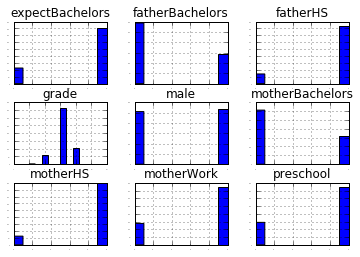

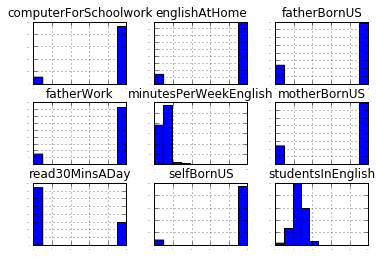

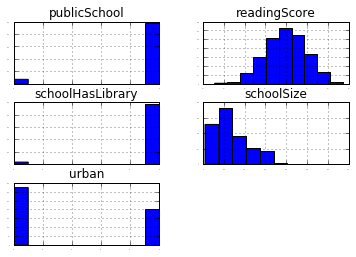

In [9]:
### Unimodal Data Visualizations
allData[allData.columns[:10]].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
allData[allData.columns[10:19]].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
allData[allData.columns[19:]].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

The target variable **readingScore** has a normal distribution. The variables **schoolSize** and **minutesPerWeekEnglish** shows some skewness.

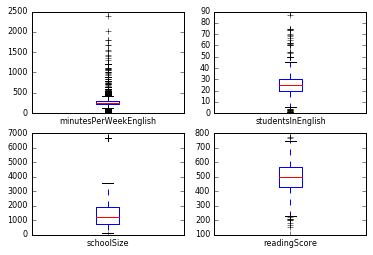

In [16]:
# box and whisker plots
allData[['minutesPerWeekEnglish','studentsInEnglish','schoolSize','readingScore']].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,
fontsize=8)
plt.show()

The box and whisker plots helps to see the outliers

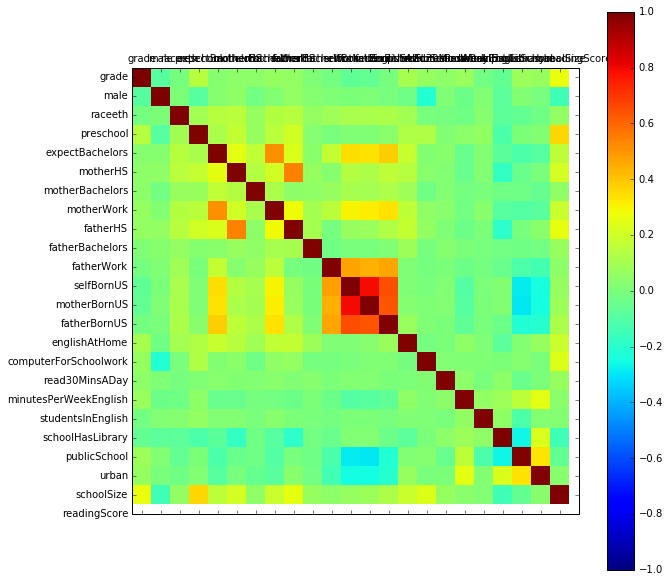

In [18]:
# correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(allData.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,24,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(allData.columns.values)
ax.set_yticklabels(allData.columns.values)

plt.show()

The dark red color shows positive correlations whereas the dark blue color shows negative correlation.

Most correlations observed are:
* 'motherHS' and 'fatherHS'
* 'motherBachelors' and 'fatherBachelors'
* 'motherBornUS' and 'fatherBornUS'
* 'motherBornUS' and 'englishAtHome'
* 'fatherBornUS' and 'englishAtHome'

### Algorithms and Techniques

### Benchmack

In [24]:
meanScore = np.mean(pisaTest.readingScore)
testSetRMSE = np.sqrt(np.mean((meanScore - pisaTest.readingScore)**2))
testSetRMSE

95.789867016192261

## III. Methodology
(3-5 pages)

### Data Preprocessing

In [28]:
allData.isnull().sum()

grade                      0
male                       0
raceeth                   48
preschool                 77
expectBachelors           85
motherHS                 142
motherBachelors          585
motherWork               129
fatherHS                 370
fatherBachelors          857
fatherWork               346
selfBornUS                93
motherBornUS              94
fatherBornUS             171
englishAtHome             98
computerForSchoolwork     95
read30MinsADay            55
minutesPerWeekEnglish    289
studentsInEnglish        363
schoolHasLibrary         201
publicSchool               0
urban                      0
schoolSize               231
readingScore               0
dtype: int64

### Implementation

### Refinement

## IV. Results
(2-3 pages)

### Model Evaluation and Validation

### Justification

## V. Conclusion
(1-2 pages)

### Free-Form Visualization

### Reflection

### Improvement

### References
[1] Berger, Kathleen. Invitation to The Life Span (second ed.). worth. ISBN 978-1-4641-7205-2.

In [4]:
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [5]:
pisaTrain = pisaTrain.dropna()
pisaTrain.shape

(2414, 24)

In [6]:
pisaTest = pisaTest.dropna()
pisaTest.shape

(990, 24)

In [7]:
pisaTrain['raceeth'].value_counts()

White                                     1470
Hispanic                                   500
Black                                      228
Asian                                       95
More than one race                          81
American Indian/Alaska Native               20
Native Hawaiian/Other Pacific Islander      20
Name: raceeth, dtype: int64

In [9]:
pisaTrain.columns

Index([u'grade', u'male', u'raceeth', u'preschool', u'expectBachelors',
       u'motherHS', u'motherBachelors', u'motherWork', u'fatherHS',
       u'fatherBachelors', u'fatherWork', u'selfBornUS', u'motherBornUS',
       u'fatherBornUS', u'englishAtHome', u'computerForSchoolwork',
       u'read30MinsADay', u'minutesPerWeekEnglish', u'studentsInEnglish',
       u'schoolHasLibrary', u'publicSchool', u'urban', u'schoolSize',
       u'readingScore'],
      dtype='object')